# Data Wrangling

## 1. Load the data and process only extractive

In [ ]:
def load_json(file_path):
    counter=0
    data=[]
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line.rstrip('\n|\r')))
            counter +=1
    print('Number of text lines processed', counter)
    #convert to pandas dataframe format and return.
    return pd.DataFrame(data)

In [ ]:
#read training data from jsonl file\
train_df = load_json('./Data/train-stats.jsonl')

#read test data from jsonl file
test_df=load_json('./Data/test-stats.jsonl')

train_df.head(2)

Number of text lines processed 995041
Number of text lines processed 108862


,url,archive,title,date,text,summary,compression,coverage,density,compression_bin,coverage_bin,density_bin
0,http://www.nytimes.com/2006/06/04/sports/socce...,http://web.archive.org/web/20060618204254id_/h...,Surge in Racist Mood Raises Concerns on Eve of...,20060618204254,"HAMBURG, Germany, June 3  As he left the socc...",A surge in discriminatory behavior toward blac...,137.470588,1.000000,7.823529,high,high,mixed
1,http://www.nytimes.com/2005/12/24/politics/24s...,http://web.archive.org/web/20060620043011id_/h...,"Spy Agency Mined Vast Data Trove, Officials Re...",20060620043011,"WASHINGTON, Dec. 23 - The National Security Ag...","The volume of information harvested, without \...",33.636364,0.909091,4.727273,medium,medium,mixed


In [ ]:
#filter for extractive summaries only
train_df = train_df[train_df.density_bin == 'extractive']
test_df = test_df[test_df.density_bin == 'extractive']

**Save both filtered data to pickle files to reload after session crash**

In [ ]:
#save to pickle files
with open('Data/train_df.pickle', 'wb') as handle:                                     
    pickle.dump(train_df, handle)

with open('Data/test_df.pickle', 'wb') as handle:                                     
    pickle.dump(test_df, handle)

## 1a. **Load train and test data after session reconnect**

In [ ]:
train_df = pd.read_pickle('Data/train_df.pickle')
train_df.head(2)

,url,archive,title,date,text,summary,compression,coverage,density,compression_bin,coverage_bin,density_bin
2,http://www.nytimes.com/2006/04/23/business/you...,http://web.archive.org/web/20060909062911id_/h...,Investors vs. Pfizer: Guess Who Has the Guns?,20060909062911,IF outsized executive pay has indeed become a ...,The battle between Pfizer Inc.'s investors and...,33.880000,1.000000,11.720000,medium,high,extractive
3,http://www.nydailynews.com/archives/gossip/199...,http://web.archive.org/web/20080313232743id_/h...,REX FLEXED PECS FOR SKIN PICS,20080313232743,BY A.J. BENZA & MICHAEL LEWITTES\n\nIf Simon R...,"If Simon Rex looks a little familiar, it may n...",11.894118,0.988235,38.988235,low,high,extractive


In [ ]:
test_df = pd.read_pickle('Data/test_df.pickle')
train_df.head(2)

,url,archive,title,date,text,summary,compression,coverage,density,compression_bin,coverage_bin,density_bin
2,http://www.nytimes.com/2006/04/23/business/you...,http://web.archive.org/web/20060909062911id_/h...,Investors vs. Pfizer: Guess Who Has the Guns?,20060909062911,IF outsized executive pay has indeed become a ...,The battle between Pfizer Inc.'s investors and...,33.880000,1.000000,11.720000,medium,high,extractive
3,http://www.nydailynews.com/archives/gossip/199...,http://web.archive.org/web/20080313232743id_/h...,REX FLEXED PECS FOR SKIN PICS,20080313232743,BY A.J. BENZA & MICHAEL LEWITTES\n\nIf Simon R...,"If Simon Rex looks a little familiar, it may n...",11.894118,0.988235,38.988235,low,high,extractive


In [ ]:
print('Total number of samples in tain data', len(train_df))
print('Total number of samples in test data', len(test_df))

Total number of samples in tain data 332131
Total number of samples in test data 36165


## 2. Sentence tokenization and embedding using spacy and sentence transformer

In [ ]:
embedder = SentenceTransformer('distilbert-base-nli-mean-tokens') # sent embedder
def clean_embed(text, 
                nlp = spacy.load("en_core_web_lg"), 
                embedder = embedder,
                min_len=2):
    
    text = nlp(text)  
    sents = list(text.sents) #convert to list of sentences
                                                                                             
    sents_clean = [sentence.text for sentence in sents if len(sentence)> min_len] #remove short sentences by threshhold       
    
    sents_clean = [sentence for sentence in sents_clean if len(sentence)!=0] #remove entries with empty list
    
    sents_embedding= np.array(embedder.encode(sents_clean, convert_to_tensor=True)) #embed sentences (deafult uses BERT SentenceTransformer)
    
    return sents_clean, sents_embedding

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/450 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
#truncate for faster computation
train_df = train_df.head(5000).reset_index(drop=True)
test_df = test_df.head(500).reset_index(drop=True)

#extract clean sentence and sentence embedding for each article TEXT
df_tmp = train_df['text'].apply(clean_embed)
train_df['text_clean'] = df_tmp.apply(lambda x: x[0])
train_df['text_embedding'] = df_tmp.apply(lambda x: x[1])
df_tmp = test_df['text'].apply(clean_embed)
test_df['text_clean'] = df_tmp.apply(lambda x: x[0])
test_df['text_embedding'] = df_tmp.apply(lambda x: x[1])

#extract clean sentence list and sentence embedding for each article SUMMARY
df_temp = train_df['summary'].apply(lambda summ: clean_embed(summ, min_len = 0))
train_df['summary_clean'] = df_temp.apply(lambda x: x[0])
train_df['summary_embedding'] = df_temp.apply(lambda x: x[1])
df_temp = test_df['summary'].apply(lambda summ: clean_embed(summ, min_len = 0))
test_df['summary_clean'] = df_temp.apply(lambda x: x[0])
test_df['summary_embedding'] = df_temp.apply(lambda x: x[1])

train_df.head(2)

,url,archive,title,date,text,summary,compression,coverage,density,compression_bin,coverage_bin,density_bin,text_clean,text_embedding,summary_clean,summary_embedding
0,http://www.nytimes.com/2006/04/23/business/you...,http://web.archive.org/web/20060909062911id_/h...,Investors vs. Pfizer: Guess Who Has the Guns?,20060909062911,IF outsized executive pay has indeed become a ...,The battle between Pfizer Inc.'s investors and...,33.880000,1.000000,11.720000,medium,high,extractive,[IF outsized executive pay has indeed become a...,"[[0.29463938, -0.5955452, -0.07718178, -1.1811...",[The battle between Pfizer Inc.'s investors an...,"[[-0.416416, -0.69821906, -0.30584174, -1.0871..."
1,http://www.nydailynews.com/archives/gossip/199...,http://web.archive.org/web/20080313232743id_/h...,REX FLEXED PECS FOR SKIN PICS,20080313232743,BY A.J. BENZA & MICHAEL LEWITTES\n\nIf Simon R...,"If Simon Rex looks a little familiar, it may n...",11.894118,0.988235,38.988235,low,high,extractive,"[BY A.J. BENZA & MICHAEL LEWITTES\n\n, If Simo...","[[-0.70827645, 0.46155792, 0.2582969, -1.15755...","[If Simon Rex looks a little familiar, it may ...","[[-0.050814025, -0.23244114, 0.03911164, -0.86..."


In [ ]:
print('Total number of samples in tain data after truncation', len(train_df))
print('Total number of samples in test data after truncation', len(test_df))

Total number of samples in tain data after truncation 5000
Total number of samples in test data after truncation 500


In [ ]:
#save to pickle files
with open('Data/train_clean_embed.pickle', 'wb') as handle:                                     
    pickle.dump(train_df, handle)

with open('Data/test_clean_embed.pickle', 'wb') as handle:                                     
    pickle.dump(test_df, handle)

In [ ]:
# Uncomment the following to load clean train-test data after session disconnect or to start from here
train_df = pd.read_pickle('Data/train_clean_embed.pickle')
test_df = pd.read_pickle('Data/test_clean_embed.pickle')

## 3. Calculate Target Labels

In [ ]:
def indx_max_cosine(summary_sent_embed, doc_emedd):
    '''returns array of indices for max cosine similarity per summary sentences'''
    cos_sim_mat = cosine_similarity(summary_sent_embed, doc_emedd)
    idx_arr = np.argmax(cos_sim_mat, axis=0)
    return idx_arr

def label_sent(text_embd, summary_embd):
    '''returns index list and binary target labels in an array'''
    num_doc = text_embd.shape[0]
    
    labels = [np.zeros(doc.shape[0]) for doc in text_embd.tolist()] #initialize list of labels with zeros
    
    idx_list = [np.sort(indx_max_cosine(text_embd[j], summary_embd[j])) for j in range(num_doc)] #calc idx for most similar
    for j in range(num_doc):
        labels[j][idx_list[j]]= 1 
    return idx_list, labels


In [ ]:
#get index list and target labels from traning set
idx_list, labels = label_sent(train_df.text_embedding, train_df.summary_embedding)
train_df['labels'] = labels
train_df['labels_idx'] = idx_list

#get index list and target labels from test data
idx_list, labels = label_sent(test_df.text_embedding, test_df.summary_embedding)
test_df['labels'] = labels
test_df['labels_idx'] = idx_list

train_df.head(2) #print 1st two documents from training set

,url,archive,title,date,text,summary,compression,coverage,density,compression_bin,coverage_bin,density_bin,text_clean,text_embedding,summary_clean,summary_embedding,labels,labels_idx
0,http://www.nytimes.com/2006/04/23/business/you...,http://web.archive.org/web/20060909062911id_/h...,Investors vs. Pfizer: Guess Who Has the Guns?,20060909062911,IF outsized executive pay has indeed become a ...,The battle between Pfizer Inc.'s investors and...,33.880000,1.000000,11.720000,medium,high,extractive,[IF outsized executive pay has indeed become a...,"[[0.29463938, -0.5955452, -0.07718178, -1.1811...",[The battle between Pfizer Inc.'s investors an...,"[[-0.416416, -0.69821924, -0.3058418, -1.08710...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[11]
1,http://www.nydailynews.com/archives/gossip/199...,http://web.archive.org/web/20080313232743id_/h...,REX FLEXED PECS FOR SKIN PICS,20080313232743,BY A.J. BENZA & MICHAEL LEWITTES\n\nIf Simon R...,"If Simon Rex looks a little familiar, it may n...",11.894118,0.988235,38.988235,low,high,extractive,"[BY A.J. BENZA & MICHAEL LEWITTES\n\n, If Simo...","[[-0.7082764, 0.46155843, 0.25829712, -1.15755...","[If Simon Rex looks a little familiar, it may ...","[[-0.05081406, -0.23244114, 0.039111733, -0.86...","[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1, 2, 3]"


## 4. Subject domain labels for each article

### Compute embeding features and domain features using sentence number and document length

In [ ]:
# def comp_dom_feature(df_embed, df_label):
    
#     return df

def comp_features(df):
    embed_text = df.text_embedding
    y_labels= df.labels

    #label docs
    doc_label = pd.Series(range(df.shape[0]), name = 'doc_label')
    doc_mean = embed_text.apply(lambda x: x.mean(axis=0).reshape(1,-1))
    doc_length = embed_text.apply(lambda x: x.shape[0])

    #create values for each sentence in doc 
    X_doc_label_list =[]
    X_doc_mean_list = []
    X_doc_length_list = []
    X_sent_num_list = []

    for j in range(len(df)):
        X_doc_label = doc_label[j]
        X_doc_mean = doc_mean[j]
        X_doc_length = doc_length[j]
        X_text = embed_text[j]
        n = X_text.shape[0]
        
        #store temporary to repeat by one less than number of sentences
        X_doc_label1 = X_doc_label
        X_doc_mean1 = X_doc_mean
        X_doc_length1 = X_doc_length 
        sent_num = []
        for i in range(n-1): 
            X_doc_label = np.vstack((X_doc_label, X_doc_label1 )) 
            X_doc_mean = np.vstack((X_doc_mean, X_doc_mean1 )) 
            X_doc_length = np.vstack((X_doc_length, X_doc_length1)) 
            sent_num.append(i)
        sent_num.append(n-1)
        
        X_doc_label_list.append(X_doc_label)
        X_doc_mean_list.append(X_doc_mean)
        X_doc_length_list.append(X_doc_length)
        X_sent_num_list.append(np.array(sent_num).reshape(-1,1))
        
    #from list to pandas series
    doc_label = pd.Series(X_doc_label_list)
    doc_mean = pd.Series(X_doc_mean_list)
    doc_length = pd.Series(X_doc_length_list)
    sent_num = pd.Series(X_sent_num_list)

    #concatenate documents with rows = sentences
      #intialize
    Xy_doc_label = doc_label.values[0]
    X = np.hstack((embed_text[0], doc_mean[0], sent_num[0], doc_length[0]))
    y= y_labels[0].reshape(-1,1)
      #recursive population
    f = np.vectorize(lambda x: x if type(x) == np.ndarray else np.array([[x]]))  
    for j in range(1, len(df)):
        Xy_doc_label_new = doc_label.values[j]
        
        X_text_new = embed_text [j]
        X_sent_num_new = sent_num[j]
        X_doc_mean_new = doc_mean[j]
        X_doc_length_new = f(doc_length[j])
        y_new = y_labels[j].reshape(-1,1)
        
        X_new = np.hstack((X_text_new, X_doc_mean_new, X_sent_num_new, X_doc_length_new))
        
        X = np.vstack((X, X_new))
        y = np.vstack((y, y_new))           
        
        Xy_doc_label = np.vstack((Xy_doc_label, Xy_doc_label_new))
            
    #wrap X in dataframe with lables
    labels_text_embedding = ['Sent_BERT_D_' + str(j) for j in range(768)]
    labels_doc_mean = ['Doc_BERT_D_' + str(j) for j in range(768)]
    other_labels = ['Sent_Number', 'Doc_Length']
    col_names = labels_text_embedding + labels_doc_mean + other_labels

    X_df = pd.DataFrame(X, columns = col_names)

    # domFeature_df = comp_dom_feature()

    return X_df, Xy_doc_label, y

In [ ]:
def dom_feature(X_df, Xy_doc_label, embedder):    
    #Make single df with only Embeddings and doc label
    df_embed = X_df.loc[:,'Doc_BERT_D_0': 'Doc_BERT_D_767']
    df_doc_label = pd.DataFrame(Xy_doc_label, columns=['doc_label'])
    Dom_df = pd.concat([df_doc_label, df_embed], axis=1)
    # print(len(Dom_df))
    Dom_df = Dom_df.drop_duplicates().set_index('doc_label', drop=True)
    # print(len(Dom_df))

    #embed function
    embed = lambda x: embedder.encode(x, convert_to_tensor=False)

    #define subject domains
    domains = ['entertainment','politics', 'business', 'crime']
    #find domain word embeddings using BERT
    domain_embed = [embed(dom) for dom in domains]
    #wrap in dataframe
    df_dom_embed = pd.DataFrame(domain_embed, index = domains,
                                columns = Dom_df.columns)
    #calculate cosine similarity between article and each subject
    cos_matrix = cosine_similarity(Dom_df, df_dom_embed)

    #return subject word from index number function
    f = np.vectorize(lambda x: domains[x])
    #find max cos sim and return matching subject
    doc_domain = f(np.argmax(cos_matrix, axis=1))
    #Add to primary dataframe
    Dom_df['domain'] = doc_domain
    return Dom_df

In [ ]:
#Compute embedding and domain features for train dataset
xTrain, Train_doc_label, yTrain = comp_features(train_df)
domTrain_df = dom_feature(xTrain,Train_doc_label, embedder)

xTest, Test_doc_label, yTest = comp_features(test_df)
domTest_df = dom_feature(xTest,Test_doc_label, embedder)

### Save the outcome of the data wrangling: Train Data and Test Data ready to be used for trainig ML and testing

In [ ]:
# convert labels to numpy 1darray and save all the data
Train_doc_label = Train_doc_label.reshape(-1)
yTrain = yTrain.reshape(-1)
dataTrain = {'train_df': train_df, 'Train_doc_label': Train_doc_label, 'xTrain': xTrain, 'yTrain': yTrain, 'domTrain': domTrain_df}
with open('Data/train_feature.pickle', 'wb') as handle:                                     
    pickle.dump(dataTrain, handle)

Test_doc_label = Test_doc_label.reshape(-1)
yTest = yTest.reshape(-1)
dataTest = {'test_df': test_df, 'Test_doc_label': Test_doc_label, 'xTest': xTest, 'yTest': yTest, 'domTest':domTest_df}
with open('Data/test_feature.pickle', 'wb') as handle:                                     
    pickle.dump(dataTest, handle)

**Train Features and Test Features saved in previous section are the final features extracted for training the ML model.**

In [ ]:
#uncomment following to load train/test data and run rest of the section after sesson disconnect
dataTrain = pd.read_pickle('Data/train_feature.pickle')
train_df, Train_doc_label = dataTrain['train_df'], dataTrain['Train_doc_label']
xTrain, yTrain, domTrain_df = dataTrain['xTrain'], dataTrain['yTrain'], dataTrain['domTrain']

dataTest = pd.read_pickle('Data/test_feature.pickle')
test_df, Test_doc_label = dataTest['test_df'], dataTest['Test_doc_label']
xTest, yTest, domTest_df = dataTest['xTest'], dataTest['yTest'], dataTest['domTest']

In [ ]:
print('Shape of xTrain', xTrain.shape)
print('Shape of Train_doc_label', Train_doc_label.shape)
print('Shape of yTrain', yTrain.shape)
print('Shape of xTest', xTest.shape)
print('Shape of Test_doc_label', Test_doc_label.shape)
print('Shape of yTest', yTest.shape)

Shape of xTrain (151173, 1538)
Shape of Train_doc_label (151173,)
Shape of yTrain (151173,)
Shape of xTest (14702, 1538)
Shape of Test_doc_label (14702,)
Shape of yTest (14702,)


In [ ]:
sent_length = pd.DataFrame(train_df.text_clean.apply(len).values, columns=['Article'])
sent_length['Summary'] = train_df.summary_clean.apply(len) 
pd.DataFrame(sent_length.mean().apply(lambda x: round(x,3)), columns = ['mean'])

,mean
Article,30.235
Summary,3.038


In [ ]:
train_df.describe()

,compression,coverage,density
count,5000.000000,5000.000000,5000.000000
mean,15.808952,0.966611,30.413089
std,23.386748,0.041583,21.966912
min,1.000000,0.547170,8.190476
25%,5.417964,0.953782,15.149351
50%,9.515877,0.978723,24.500000
75%,18.607794,1.000000,37.921840
max,687.200000,1.000000,281.062977


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


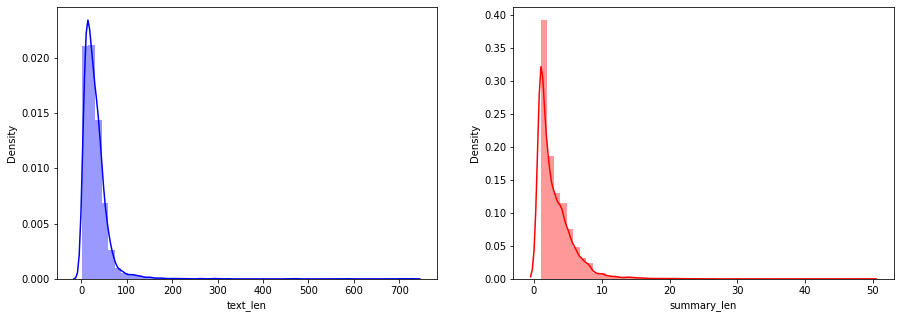

In [ ]:
train_df['text_len'] = train_df['text_clean'].apply(len)
train_df['summary_len'] = train_df['summary_clean'].apply(len)

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.distplot(train_df.text_len,ax=axes[0],color='blue')
sns.distplot(train_df.summary_len,ax=axes[1],color='red')

## Embedding Visualization by Domain Subjects

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


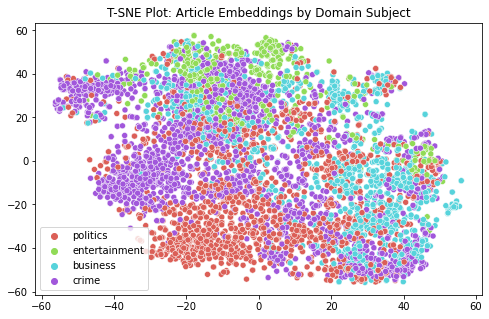

In [ ]:
# Create X data from domain features from step 4 of prev section
X = domTrain_df.values

#Separate labels and embeddings
X_tsne_embed = X[:, :-1]
X_tsne_labels = X[:,-1]

#Reduce dimension of embeddings with t-sne
X_tsne = TSNE(n_components=2).fit_transform(X_tsne_embed)

#assign to verticala nd horizontal axis
x = X_tsne[:,0]
y = X_tsne[:,1]
#set labels
labels = X_tsne_labels

#plot visualization
plt.figure(figsize=(8,5))
sns.scatterplot(x=x, y=y, hue=labels, 
                palette=sns.color_palette("hls", 4), legend="full");
plt.title('T-SNE Plot: Article Embeddings by Domain Subject');

In [ ]:
df_domain_count = pd.DataFrame(domTrain_df['domain'].value_counts(normalize=True))
df_domain_count.columns=['Normalized Count']
df_domain_count

,Normalized Count
crime,0.3918
politics,0.2914
business,0.2230
entertainment,0.0938


### Describe the leading sentences

In [ ]:
#flatten labels idx list
sent_numbers = np.concatenate(train_df.labels_idx)
#count sentence numbers
unique, counts = np.unique(sent_numbers, return_counts=True)
#Wrap in dataframe, noemalize and display first 10 sentences
norm_counts = pd.DataFrame(counts / counts.sum(), index=range(1,len(counts)+1),
                           columns = ['Normalized Count'])
norm_counts = norm_counts.apply(lambda x: round(x,3))
norm_counts.index.name= 'sent_number'
norm_counts['Cumulative'] = norm_counts.iloc[:,0].cumsum()
norm_counts.iloc[:10,:]

,Normalized Count,Cumulative
sent_number,,
1,0.241,0.241
2,0.183,0.424
3,0.138,0.562
4,0.098,0.660
5,0.064,0.724
6,0.041,0.765
7,0.030,0.795
8,0.020,0.815
9,0.017,0.832


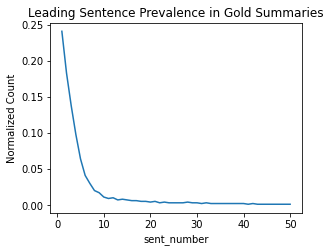

In [ ]:
#plot normlaized count for first 
plt.figure(figsize=(4.5,3.5))
norm_counts['Normalized Count'].iloc[:50].plot(title='Leading Sentence Prevalence in Gold Summaries',
                                              ylabel='Normalized Count');

In [ ]:
def return_greater_than_min_num(arr, thresh=0.5, min_num=1, fix_num_flag=True, fix_num=3):
    if fix_num_flag == True:
        idx = np.argsort(arr)[-fix_num:]  
    else:
        idx_prelim = np.where(arr>= thresh)
        if idx_prelim[0].shape[0] <= min_num:
            idx = np.argsort(arr)[-min_num:]
        else:
            idx = idx_prelim
    return sorted(idx)

def predict_summaries(Xy_doc_label, y_pred, df_text, return_all = True):
    temp = {'doc_label': Xy_doc_label.flatten(), 'y_pred': y_pred.flatten()}
    df_label_pred = pd.DataFrame(temp).groupby('doc_label').agg(list)
    df_label_pred = df_label_pred.applymap(lambda x: np.array(x))
    df_label_pred = df_label_pred.applymap(lambda arr: return_greater_than_min_num(arr)) 

    df_doc = df_text[df_label_pred.index] #Return predicted summary
    
    pred_summaries = [np.array(df_doc.iloc[j])
                      [df_label_pred.iloc[j][0]].tolist()  for j in range(len(df_label_pred))]

    pred_summaries = [summ_list if type(summ_list) == str else 
                      ' '.join(summ_list) for summ_list in pred_summaries]
    if return_all == True:
        out = df_label_pred.values, df_label_pred.index, pred_summaries
    else:
        out = pred_summaries
    return out
    

def rougeScores(pred_summaries, gold_summaries, keys=['rouge1', 'rougeL'], use_stemmer=True):
    scorer = rouge_scorer.RougeScorer(keys, use_stemmer= use_stemmer) #Cal rouge scores
    n = len(pred_summaries)
    scores = [scorer.score(pred_summaries[j], gold_summaries[j]) for j in range(n)] 
    dict_scores={}                                                            
    for key in keys:
        dict_scores.update({key: {}})
    for key in keys:
        precision_list = [scores[j][key][0] for j in range(len(scores))]
        recall_list = [scores[j][key][1] for j in range(len(scores))]
        f1_list = [scores[j][key][2] for j in range(len(scores))]
        precision = np.mean(precision_list)
        recall = np.mean(recall_list)
        f1 = np.mean(f1_list)
        dict_results = {'recall': recall, 'precision': precision, 'f1': f1}
        dict_scores[key] = dict_results
    return dict_scores

## TextRank, a graph-based model for the processing of text

In [ ]:
df_embed = xTest.loc[:,'Doc_BERT_D_0': 'Doc_BERT_D_767']
df_doc_label = pd.DataFrame(Test_doc_label, columns=['doc_label'])
df = pd.concat([df_doc_label, df_embed], axis=1)

#loop through articles (docs)
pagerank_scores_list=[]
error_list = []
doc_num = np.max(Test_doc_label) 
for j in range(doc_num+1):
    #calculate cosine similiarity matrix 
    df_doc = df [df.doc_label == j].iloc[:,2:]
    n = df_doc.shape[0]
    cos_matrix = cosine_similarity(df_doc, df_doc)
    f = np.vectorize(lambda x: 0 if x == 1 else 1)
    not_eye = f(np.eye(n,n))
    cos_matrix = cos_matrix * not_eye
    
    #Convert to nx graph
    graph = nx.from_numpy_array(cos_matrix)
    
    #Calculate sentence scores and record error docs
    try:
        scores_arr = np.array(list(nx.pagerank(graph, max_iter=500).values()))
    except:
        scores_arr = np.nan
        error_list.append(j)
   
    pagerank_scores_list.append(scores_arr)
    
pagerank_scores_arr = np.array(pagerank_scores_list)
perfData = {'pagerank_scores_arr':pagerank_scores_arr}

<ipython-input-6-91035cd957d1>:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pagerank_scores_arr = np.array(pagerank_scores_list)


In [ ]:
df_tmp = test_df
df_tmp['textrank_err'] = pagerank_scores_arr[:len(df_tmp)]

#pick top3 sentence by textrank score
df_tmp['idx'] = df_tmp['textrank_err'].apply(lambda x: sorted(np.argsort(x)[-3:])).values
idx_arr = df_tmp['idx'].values

#convert list of sentences to string for each predicted summary
pred_summaries = [' '.join(np.array(test_df.text_clean.iloc[j])[idx_arr[j]].tolist())
                  for j in range(len(idx_arr))]

#convert cleaned gold summary sentence lists to string for each summary
df_gold = test_df.summary_clean
gold_summaries = [' '.join(df_gold .iloc[j]) for j in range(len(pred_summaries))]

#zip each predicted / gold summary pair together and store in another tuple
summaries_comp = tuple(zip(pred_summaries, gold_summaries))

#calculate rouge scores
scores = rougeScores(pred_summaries, gold_summaries, keys=['rouge1', 'rougeL'], use_stemmer=True)

In [ ]:
model_df = pd.DataFrame({'ModelID' : ['TR:Rouge1', 'TR:RougeL']})
res_TR = pd.DataFrame(columns=['recall' , 'precision', 'f1'])
res_TR = res_TR.append(pd.DataFrame(scores).T, ignore_index=True)
res_TR = pd.concat([model_df, res_TR],axis = 1)
res_TR

,ModelID,recall,precision,f1
0,TR:Rouge1,0.272896,0.315467,0.250868
1,TR:RougeL,0.195855,0.233583,0.182307


In [ ]:
#save to pickle file
summaryComp = {'summaries_comp_T_rank': summaries_comp}
# with open('Data/summaryComp.pickle', 'wb') as handle:                                     
#     pickle.dump(summaryComp, handle)

## Logistic Regression; default model and elastic net

### Default Model

In [ ]:
model = LogisticRegression(random_state=42)
model.fit(xTrain, yTrain)
#Predict Model
y_pred = model.predict_proba(xTest)
    
#Convert to binary predictions
y_pred_bin = (y_pred >=0.5)*1

#Return predicted summaries
idx, doc_index, pred_summaries = predict_summaries(Test_doc_label, y_pred[:,0], test_df.text_clean)

#Match with gold summaries
df_gold = test_df.summary_clean[doc_index]
gold_summaries = [' '.join(df_gold .iloc[j]) for j in range(len(pred_summaries))]
summaries_comp = tuple(zip(pred_summaries, gold_summaries))
scores = rougeScores(pred_summaries, gold_summaries, keys=['rouge1', 'rougeL'], use_stemmer=True)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('Original Summary')
summaries_comp[0][1]

Original Summary


'Bleeding from a massive chest wound, Tejano star Selena cried, "Help me! Help me! I\'ve been shot!"and then named her killer with her dying breath. Shaken witnesses yesterday told a spellbound Houston courtroom how the blood-covered, mortally wounded 23-year-old Hispanic singing sensation burst into the lobby of the Corpus Christi Days Inn last March 31. Gasping for breath, Selena told motel workers that Yolanda Saldivar the president of her fan club shot'

In [ ]:
print('Predicted Summary by LR Default')
summaries_comp[0][0]

Predicted Summary by LR Default


'"It was covered with blood. But before Selena could hand it over, she was shot. Prosecutors say it was deliberate.'

In [ ]:
model_df = pd.DataFrame({'ModelID' : ['LR_default:Rouge1', 'LR_default:RougeL']})
res_LR_default = pd.DataFrame(columns=['recall' , 'precision', 'f1'])
res_LR_default = res_LR_default.append(pd.DataFrame(scores).T, ignore_index=True)
res_LR_default = pd.concat([model_df, res_LR_default],axis = 1)
res_LR_default

,ModelID,recall,precision,f1
0,LR_default:Rouge1,0.494643,0.708379,0.514864
1,LR_default:RougeL,0.469454,0.671882,0.489722


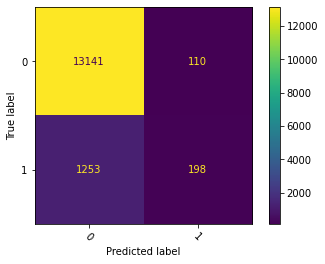

In [ ]:
# Print and visualize the results:
cm = confusion_matrix(yTest, y_pred_bin[:,1], labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['0','1'])
disp.plot(xticks_rotation=-45)
plt.show()

In [ ]:
#Update sumarry dictionary and save to pickle file
summaryComp.update({'summaries_comp_LR_default': summaries_comp})
# with open('Data/summaryComp.pickle', 'wb') as handle:                                     
#     pickle.dump(summaryComp, handle)

## LR with Elastic Net Hyperparameter Tuning

**FOlowwing cell takes very long time to complete**

In [ ]:
# Do not run this cell for results generation
# Define search spaces 
L1_ratio = [0.25, 0.5, 0.75, 1] #L1-space
C_values = [0.25, 0.5, 1, 2, 4] #C-space

Rouge1_f1 = []
Params = []

for l1 in L1_ratio:
    for C in C_values:
        model = LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=l1, C=C, random_state=42)
        model.fit(xTrain,yTrain) #Train model
        y_pred = model.predict_proba(xTest)
        
        y_pred_bin = (y_pred >=0.5)*1 #binary predictions
        
        #Return predicted summaries
        idx, doc_index, pred_summaries = predict_summaries(Test_doc_label, y_pred[:,0], test_df.text_clean)

        #Match with gold summaries
        df_gold = test_df.summary_clean[doc_index]
        gold_summaries = [' '.join(df_gold .iloc[j]) for j in range(len(pred_summaries))]
        summaries_comp = tuple(zip(pred_summaries, gold_summaries))

        scores = rougeScores(pred_summaries, gold_summaries, keys=['rouge1', 'rougeL'], use_stemmer=True)
        f1 = scores['rouge1']['f1']
        Rouge1_f1.append(f1)
        
        params = (l1, C)
        Params.append(params)
results_dictLR_tuning = {'params': Params, 'scores': Rouge1_f1}

### **Save the hyperparameter tunning results in data table format.**
results_LR_tuning = pd.DataFrame(results_dictLR_tuning).sort_values('scores', ascending=False)
results_LR_tuning.to_csv('Data/resultLR_hypParaResults.csv')
results_LR_tuning.head(5)

**Based on above sorted score, the best parameter for the Logistic regression are L1_ratio = 1 and C = 0.25**

**LogisticRegression with saga solver as implemented in the next cell takes long time**

In [ ]:
# Best Model: Using the best parameter results
model = LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=1, C=0.25, random_state=42)
model.fit(xTrain, yTrain)
#Predict Model
y_pred = model.predict_proba(xTest)
    
#Convert to binary predictions
y_pred_bin = (y_pred >=0.5)*1

#Return predicted summaries
idx, doc_index, pred_summaries = predict_summaries(Test_doc_label, y_pred[:,0], test_df.text_clean)

#Match with gold summaries
df_gold = test_df.summary_clean[doc_index]
gold_summaries = [' '.join(df_gold .iloc[j]) for j in range(len(pred_summaries))]
summaries_comp_best = tuple(zip(pred_summaries, gold_summaries))
scores = rougeScores(pred_summaries, gold_summaries, keys=['rouge1', 'rougeL'], use_stemmer=True)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
model_df = pd.DataFrame({'ModelID' : ['LR_elasticNet:Rouge1', 'LR_elasticNet:RougeL']})
res_LR_elasticNet = pd.DataFrame(columns=['recall' , 'precision', 'f1'])
res_LR_elasticNet = res_LR_elasticNet.append(pd.DataFrame(scores).T, ignore_index=True)
res_LR_elasticNet = pd.concat([model_df, res_LR_elasticNet],axis = 1)
res_LR_elasticNet

,ModelID,recall,precision,f1
0,LR_elasticNet:Rouge1,0.508569,0.727348,0.532209
1,LR_elasticNet:RougeL,0.485610,0.693151,0.508884


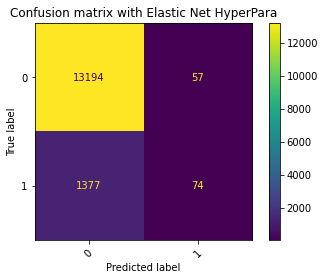

In [ ]:
cm = confusion_matrix(yTest, y_pred_bin[:,1], labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['0','1'])
disp.plot(xticks_rotation=45)
plt.title('Confusion matrix with Elastic Net HyperPara')
plt.show()

In [ ]:
#Update sumarry dictionary and save to pickle file
summaryComp.update({'summaries_comp_LR_withElasticNet': summaries_comp_best})
# with open('Data/summaryComp.pickle', 'wb') as handle:                                     
#     pickle.dump(summaryComp, handle)

In [ ]:
print('Predicted Summary by LR Elastic Net')
summaries_comp_best[0][0]

Predicted Summary by LR Elastic Net


'"It was covered with blood. But before Selena could hand it over, she was shot. Prosecutors say it was deliberate.'

## Neural Nets

**Model after training in four cases has been saved. So, no need to run the training of neural net**

In [ ]:
#class_weights for imbalanced data
pos_w = int(len(yTrain) / sum(yTrain==1))
weight_dict = {0:1, 1: pos_w/2}
init = tf.keras.initializers.HeNormal(seed = 1) # weight initializer
   
#Define Model
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model = Sequential([
          Dense(16, activation="relu", kernel_initializer=init),
          # Dense(8, activation="relu", kernel_initializer=init),    
          # Dense(16, activation="relu", kernel_initializer=init),
          Dense(1, activation="sigmoid", kernel_initializer=init)
        ])
# Compile the model
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics=['accuracy'])
metrics=[SensitivityAtSpecificity(0.5, num_thresholds=1), SpecificityAtSensitivity(0.5, num_thresholds=1)]

#Train Model
history = model.fit(xTrain, yTrain, epochs=50, batch_size=32, callbacks=[callback], class_weight=weight_dict)

Epoch 1/50
4725/4725 [==============================] - 11s 2ms/step - loss: 0.5247 - accuracy: 0.8769
Epoch 2/50
4725/4725 [==============================] - 10s 2ms/step - loss: 0.4694 - accuracy: 0.8916
Epoch 3/50
4725/4725 [==============================] - 10s 2ms/step - loss: 0.4561 - accuracy: 0.8938
Epoch 4/50
4725/4725 [==============================] - 10s 2ms/step - loss: 0.4460 - accuracy: 0.8956
Epoch 5/50
4725/4725 [==============================] - 10s 2ms/step - loss: 0.4407 - accuracy: 0.8976
Epoch 6/50
4725/4725 [==============================] - 10s 2ms/step - loss: 0.4362 - accuracy: 0.8984
Epoch 7/50
4725/4725 [==============================] - 10s 2ms/step - loss: 0.4298 - accuracy: 0.8994
Epoch 8/50
4725/4725 [==============================] - 10s 2ms/step - loss: 0.4267 - accuracy: 0.9003
Epoch 9/50
4725/4725 [==============================] - 10s 2ms/step - loss: 0.4220 - accuracy: 0.9020
Epoch 10/50
4725/4725 [==============================] - 10s 2ms/step - l

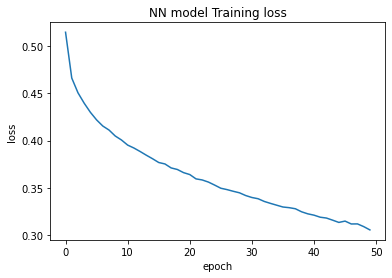

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('NN model Training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# save training model
# model.save('NN_64_16.h5')  # creates a HDF5 file 'my_model.h5'
# model.save('NN_32_8.h5')  # creates a HDF5 file 'my_model.h5'
# model.save('NN_32_16.h5')  # creates a HDF5 file 'my_model.h5'
model.save('NN_16.h5')  # creates a HDF5 file 'my_model.h5'

### **Reload the NN models to produce results after sesson reconnect**

In [ ]:
res_NN = pd.DataFrame() # run this only once to initialize df
#Predict output for test data
model_arc = ['NN_16', 'NN_32_8', 'NN_32_16', 'NN_64_16']

for m in model_arc:
    model = load_model(m + '.h5')
    print(model.summary())
    model_df = pd.DataFrame({'ModelID' : [m+':Rouge1', m+':RougeL']})

    y_pred = model.predict(xTest)

    #Return predicted summaries
    idx, doc_index, pred_summaries = predict_summaries(Test_doc_label, y_pred, test_df.text_clean)

    #Convert to binary predictions
    y_pred_bin = (y_pred >=0.5)*1

    #Match with gold summaries
    df_gold = test_df.summary_clean[doc_index]
    gold_summaries = [' '.join(df_gold .iloc[j]) for j in range(len(pred_summaries))]
    summaries_comp = tuple(zip(pred_summaries, gold_summaries))
    scores = rougeScores(pred_summaries, gold_summaries, keys=['rouge1', 'rougeL'], use_stemmer=True)
    #Update sumarry dictionary and save to pickle file
    summaryComp.update({'summaries_comp_'+m: summaries_comp})

    tmp = pd.DataFrame(columns=['recall' , 'precision', 'f1'])
    tmp = tmp.append(pd.DataFrame(scores).T, ignore_index=True)
    tmp = pd.concat([model_df, tmp],axis = 1)
    res_NN = pd.concat([res_NN, tmp], ignore_index=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                24624     
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 24,641
Trainable params: 24,641
Non-trainable params: 0
_________________________________________________________________
None
460/460 [==============================] - 1s 1ms/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                49248     
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                    

In [ ]:
print('Predicted summary by NN model: NN_64_16')
summaries_comp[0][0]

Predicted summary by NN model: NN_64_16


'By MATT SCHWARTZ in Houston and WENDELL JAMIESON in New York Daily News Writers\n\nSaturday, October 14th 1995, 4:22AM\n\nBleeding from a massive chest wound, Tejano star Selena cried, "Help me! Help me! Shaken witnesses yesterday told a spellbound Houston courtroom how the blood-covered, mortally wounded 23-year-old Hispanic singing sensation burst into the lobby of the Corpus Christi Days Inn last March 31.\n\n'

In [ ]:
res_NN

,ModelID,recall,precision,f1
0,NN_16:Rouge1,0.555342,0.746306,0.565705
1,NN_16:RougeL,0.537553,0.718952,0.547235
2,NN_32_8:Rouge1,0.560763,0.729521,0.563156
3,NN_32_8:RougeL,0.541522,0.700605,0.543300
4,NN_32_16:Rouge1,0.557103,0.744142,0.565558
5,NN_32_16:RougeL,0.538271,0.715307,0.545916
6,NN_64_16:Rouge1,0.556960,0.736683,0.565116
7,NN_64_16:RougeL,0.537369,0.706557,0.544387


In [ ]:
summaryComp.keys()

dict_keys(['summaries_comp_T_rank', 'summaries_comp_LR_default', 'summaries_comp_LR_withElasticNet', 'summaries_comp_NN_16', 'summaries_comp_NN_32_8', 'summaries_comp_NN_32_16', 'summaries_comp_NN_64_16'])

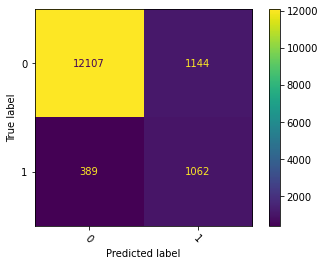

In [ ]:
# Print and visualize the results:
cm = confusion_matrix(yTest, y_pred_bin, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['0','1'])
disp.plot(xticks_rotation=-45)
plt.show()

**Reload results and neccesary varables so far**

In [ ]:
#uncomment following to load train/test data and run rest of the section after sesson disconnect
dataTrain = pd.read_pickle('Data/train_feature.pickle')
train_df, Train_doc_label = dataTrain['train_df'], dataTrain['Train_doc_label']
xTrain, yTrain, domTrain_df = dataTrain['xTrain'], dataTrain['yTrain'], dataTrain['domTrain']

dataTest = pd.read_pickle('Data/test_feature.pickle')
test_df, Test_doc_label = dataTest['test_df'], dataTest['Test_doc_label']
xTest, yTest, domTest_df = dataTest['xTest'], dataTest['yTest'], dataTest['domTest']

## LEAD3 as the baseline model

In [ ]:
#Return predicted summary
df_doc = test_df.text_clean
pred_summaries = [np.array(df_doc.iloc[j])[:3] for j in range(len(df_doc))]
pred_summaries = [summ_list if type(summ_list) == str else ' '.join(summ_list) for summ_list in pred_summaries]

#Match with gold summaries
df_gold = test_df.summary_clean
gold_summaries = [' '.join(df_gold .iloc[j]) for j in range(len(pred_summaries))]
summaries_comp = tuple(zip(pred_summaries, gold_summaries))
scores = rougeScores(pred_summaries, gold_summaries, keys=['rouge1', 'rougeL'], use_stemmer=True)
model_df = pd.DataFrame({'ModelID' : ['LEAD3:Rouge1', 'LEAD3:RougeL']})
res_LEAD3 = pd.DataFrame(columns=['recall' , 'precision', 'f1'])
res_LEAD3 = res_LEAD3.append(pd.DataFrame(scores).T, ignore_index=True)
res_LEAD3 = pd.concat([model_df, res_LEAD3],axis = 1)
res_LEAD3

,ModelID,recall,precision,f1
0,LEAD3:Rouge1,0.564235,0.754172,0.574051
1,LEAD3:RougeL,0.547237,0.728264,0.557038


In [ ]:
summaries_comp[0][0]

'By MATT SCHWARTZ in Houston and WENDELL JAMIESON in New York Daily News Writers\n\nSaturday, October 14th 1995, 4:22AM\n\nBleeding from a massive chest wound, Tejano star Selena cried, "Help me! Help me! I\'ve been shot!"'

In [ ]:
#Update sumarry dictionary and save to pickle file
summaryComp.update({'summaries_comp_LEAD3': summaries_comp})
# with open('Data/summaryComp.pickle', 'wb') as handle:                                     
#     pickle.dump(summaryComp, handle)

## Logistic Regression

In [ ]:
#Define Model
model = LogisticRegression(class_weight='balanced', random_state=42)
#Fit model
model.fit(xTrain,yTrain)
#Predict Model
y_pred = model.predict_proba(xTest)
    
#Convert to binary predictions
y_pred_bin = (y_pred >=0.5)*1

cm = confusion_matrix(yTest, y_pred_bin[:,1], labels=[0,1])
   
#Return predicted summaries
idx, doc_index, pred_summaries = predict_summaries(Test_doc_label,  y_pred[:,0], test_df.text_clean)

#Match with gold summaries
df_gold = test_df.summary_clean[doc_index]
gold_summaries = [' '.join(df_gold .iloc[j]) for j in range(len(pred_summaries))]
summaries_comp = tuple(zip(pred_summaries, gold_summaries))

scores = rougeScores(pred_summaries, gold_summaries,  keys=['rouge1', 'rougeL'], use_stemmer=True)
model_df = pd.DataFrame({'ModelID' : ['LR_bal:Rouge1', 'LR_bal:RougeL']})
res_LR_bal = pd.DataFrame(columns=['recall' , 'precision', 'f1'])
res_LR_bal = res_LR_bal.append(pd.DataFrame(scores).T, ignore_index=True)
res_LR_bal = pd.concat([model_df, res_LR_bal],axis = 1)
res_LR_bal

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,ModelID,recall,precision,f1
0,LR_bal:Rouge1,0.225872,0.244652,0.203367
1,LR_bal:RougeL,0.144019,0.164116,0.132021


In [ ]:
summaries_comp[0][0]

'He felt for a pulse in her neck but could feel only twitching muscles, he said. "It was covered with blood. Prosecutors say it was deliberate.'

In [ ]:
#Update sumarry dictionary and save to pickle file
summaryComp.update({'summaries_comp_LR_bal': summaries_comp})
# with open('Data/summaryComp.pickle', 'wb') as handle:                                     
#     pickle.dump(summaryComp, handle)

## LSTM (Long Short Term Memory Model)

**Prepare the dataset for taining the LSTM**

In [ ]:
fn = lambda x: np.array(x)
tmp_df = train_df.copy()
tmp_df.text_embedding = tmp_df.text_embedding.apply(fn)
tmp_df.labels= tmp_df.labels.apply(fn)
tmp_df.text_embedding = tmp_df.text_embedding.apply(lambda x: x.reshape(1, x.shape[0],x.shape[1]))
tmp_df.labels = tmp_df.labels.apply(lambda x: x.reshape(1, len(x),1))
l_xTrain = tmp_df.text_embedding.tolist()
l_yTrain = tmp_df.labels.tolist()

tmp_df = test_df
tmp_df.text_embedding = tmp_df.text_embedding.apply(fn)
tmp_df.labels= tmp_df.labels.apply(fn)
tmp_df.text_embedding = tmp_df.text_embedding.apply(lambda x: x.reshape(1, x.shape[0],x.shape[1]))
tmp_df.labels = tmp_df.labels.apply(lambda x: x.reshape(1, len(x),1))
l_xTest = tmp_df.text_embedding.tolist()
l_yTest = tmp_df.labels.tolist()

In [ ]:
print('shape of training sample for first 3 sentences', l_xTrain[0].shape, l_xTrain[1].shape, l_xTrain[2].shape)
print('shape of label for first 3 sentences', l_yTrain[0].shape, l_yTrain[1].shape, l_yTrain[2].shape)
print('We see that each sentences has different length and they are labled accordingly')

shape of training sample for first 3 sentences (1, 32, 768) (1, 40, 768) (1, 19, 768)
shape of label for first 3 sentences (1, 32, 1) (1, 40, 1) (1, 19, 1)
We see that each sentences has different length and they are labled accordingly


In [ ]:
# define LSTM
model = Sequential([
                    # LSTM(32, input_shape=(None, 768), return_sequences=True, dropout=0),   # Uncomment to train LSTM with 32 nodes.
                    # LSTM(64, input_shape=(None, 768), return_sequences=True, dropout=0),   # Uncomment to train LSTM with 64 nodes.
                    # Bidirectional(LSTM(32, return_sequences=True, dropout=0), input_shape=(None, 768)), # Uncomment to train biLSTM with 32 nodes.
                    Bidirectional(LSTM(64, return_sequences=True, dropout=0), input_shape=(None, 768)),   # Uncomment to train biLSTM with 64 nodes.
                    TimeDistributed(Dense(1, activation='sigmoid'))
                    ])

metrics=[SensitivityAtSpecificity(0.5, num_thresholds=1), SpecificityAtSensitivity(0.5, num_thresholds=1)]
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics)
# train LSTM
train_loss =[]
for j in range(len(l_xTrain)):   
    X, y = l_xTrain[j], l_yTrain[j]
    history = model.fit(X, y, epochs=1, batch_size=1, verbose=0)
    train_loss.append(history.history['loss'])

In [ ]:
## save training model
# model.save('LSTM_25.h5')  # creates a HDF5 file 'my_model.h5'
# model.save('LSTM_50.h5')  # creates a HDF5 file 'my_model.h5'
# model.save('LSTM_bi_25.h5')  # creates a HDF5 file 'my_model.h5'
model.save('LSTM_bi_50.h5')  # creates a HDF5 file 'my_model.h5'

In [ ]:
model_arc = ['LSTM_25', 'LSTM_50', 'LSTM_bi_25', 'LSTM_bi_50']

for m in model_arc:
    model = load_model(m + '.h5')
    print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, None, 25)          79400     
                                                                 
 time_distributed_1 (TimeDis  (None, None, 1)          26        
 tributed)                                                       
                                                                 
Total params: 79,426
Trainable params: 79,426
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, None, 50)          163800    
                                                                 
 time_distributed_2 (TimeDis  (None, None, 1)          51        
 tributed)             

In [ ]:
res_LSTM = pd.DataFrame()
#Predict output for test data
model_arc = ['LSTM_25', 'LSTM_50', 'LSTM_bi_25', 'LSTM_bi_50']

for m in model_arc:
    model = load_model(m + '.h5')
    model_df = pd.DataFrame({'ModelID' : [m+':Rouge1', m+':RougeL']})

    # evaluate LSTM
    y_pred_list =[]
    idx_list=[]
    for j in range(len(l_xTest)):
        X= l_xTest[j]
        y_pred = model.predict(X, verbose=0)
        idx = np.argsort(y_pred[0].flatten())[-3:]
        idx = sorted(idx)
        y_pred_list.append(y_pred)
        idx_list.append(idx)
    pred_summaries = [' '.join(np.array(tmp_df.text_clean.iloc[j])[np.array(idx_list[j])].tolist()) 
                      for j in range(len(idx_list))]
    df_gold = tmp_df.summary_clean
    gold_summaries = [' '.join(df_gold .iloc[j]) for j in range(len(pred_summaries))]
    summaries_comp = tuple(zip(pred_summaries, gold_summaries))
    #calculate rouge score
    scores = rougeScores(pred_summaries, gold_summaries, keys=['rouge1', 'rougeL'], use_stemmer=True)
    summaryComp.update({'summaries_comp_'+m: summaries_comp})

    tmp = pd.DataFrame(columns=['recall' , 'precision', 'f1'])
    tmp = tmp.append(pd.DataFrame(scores).T, ignore_index=True)
    tmp = pd.concat([model_df, tmp],axis = 1)
    res_LSTM = pd.concat([res_LSTM, tmp], ignore_index=True)

In [ ]:
summaries_comp[0][0]

'By MATT SCHWARTZ in Houston and WENDELL JAMIESON in New York Daily News Writers\n\nSaturday, October 14th 1995, 4:22AM\n\nBleeding from a massive chest wound, Tejano star Selena cried, "Help me! Help me! Shaken witnesses yesterday told a spellbound Houston courtroom how the blood-covered, mortally wounded 23-year-old Hispanic singing sensation burst into the lobby of the Corpus Christi Days Inn last March 31.\n\n'

In [ ]:
res_LSTM

,ModelID,recall,precision,f1
0,LSTM_25:Rouge1,0.548410,0.761568,0.568592
1,LSTM_25:RougeL,0.530603,0.734615,0.550832
2,LSTM_50:Rouge1,0.554123,0.762394,0.573243
3,LSTM_50:RougeL,0.536463,0.735191,0.555563
4,LSTM_bi_25:Rouge1,0.552088,0.760683,0.570516
5,LSTM_bi_25:RougeL,0.533998,0.733990,0.552702
6,LSTM_bi_50:Rouge1,0.555638,0.764624,0.575063
7,LSTM_bi_50:RougeL,0.537943,0.737781,0.557474


In [ ]:
#Update sumarry dictionary and save to pickle file
with open('Data/summaryComp.pickle', 'wb') as handle:                                     
    pickle.dump(summaryComp, handle)